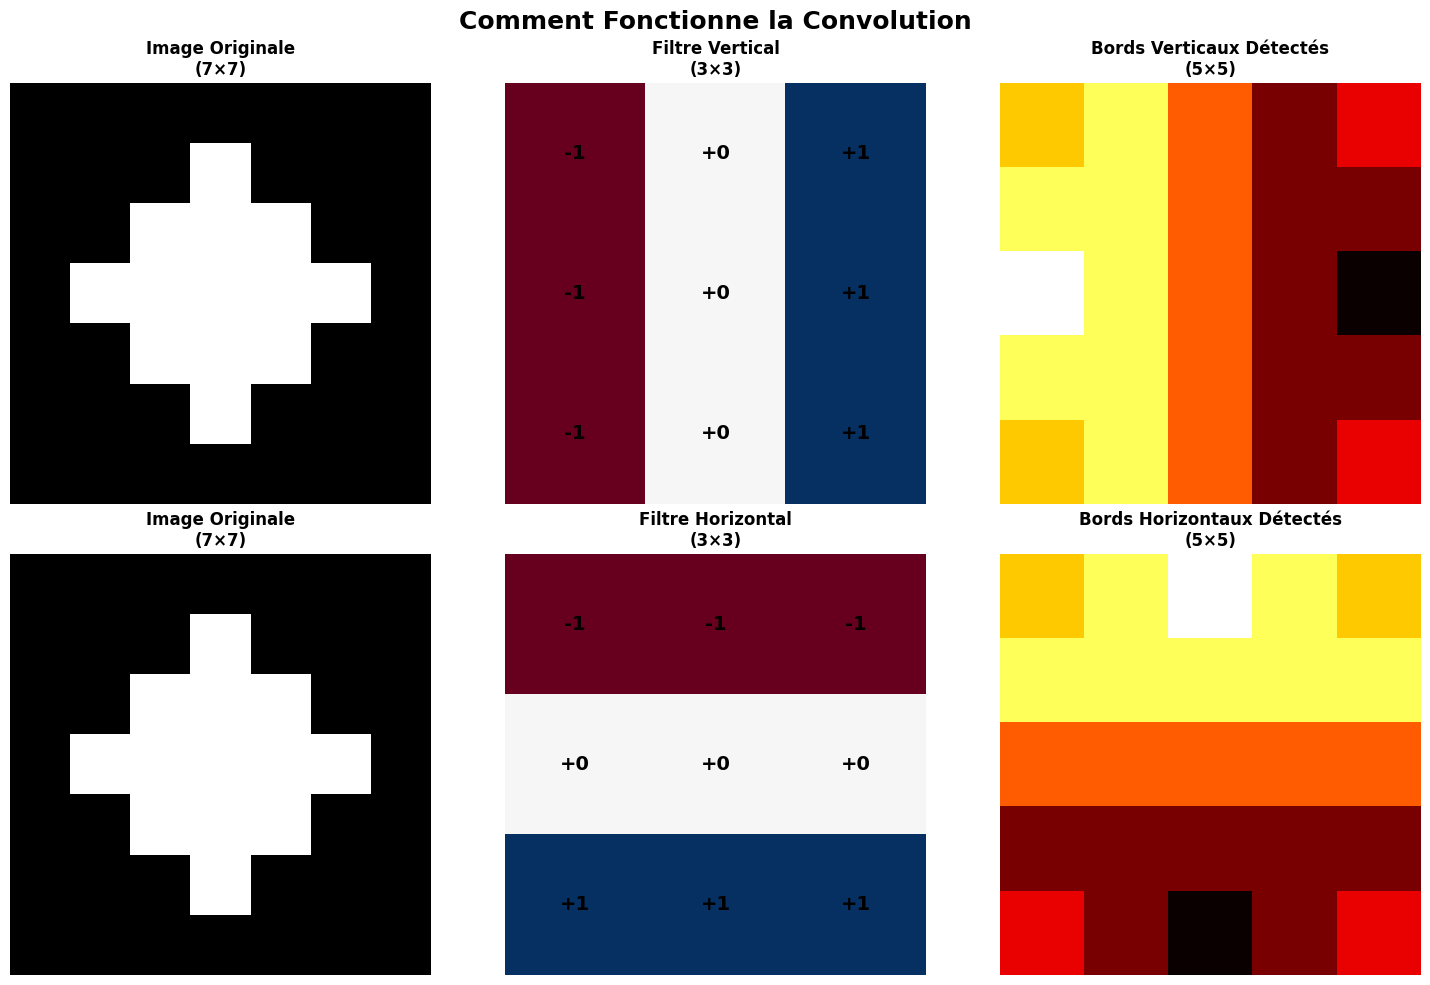


🔍 OBSERVATIONS:

1. L'image originale (7×7) avec le filtre (3×3) produit (5×5)
   Formule: output_size = input_size - filter_size + 1
           5 = 7 - 3 + 1 ✓

2. Le filtre VERTICAL détecte les changements gauche→droite
   Les valeurs élevées = bords verticaux détectés

3. Le filtre HORIZONTAL détecte les changements haut→bas
   Les valeurs élevées = bords horizontaux détectés

4. Le réseau apprend AUTOMATIQUEMENT ces filtres!
   Il optimise les valeurs pour détecter les features pertinentes.



In [1]:
# ============================================
# VISUALISATION: Comment fonctionne Conv2D
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Créer une image simple (7×7)
image = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]
])

# Filtre de détection de bord vertical
filter_vertical = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

# Filtre de détection de bord horizontal
filter_horizontal = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])

def manual_convolution(image, filter_kernel):
    """Convolution manuelle pour comprendre"""
    i_h, i_w = image.shape
    f_h, f_w = filter_kernel.shape
    output_h = i_h - f_h + 1
    output_w = i_w - f_w + 1
    
    output = np.zeros((output_h, output_w))
    
    for i in range(output_h):
        for j in range(output_w):
            # Extraire la région
            region = image[i:i+f_h, j:j+f_w]
            # Produit élément par élément puis somme
            output[i, j] = np.sum(region * filter_kernel)
    
    return output

# Appliquer les filtres
output_vertical = manual_convolution(image, filter_vertical)
output_horizontal = manual_convolution(image, filter_horizontal)

# Visualiser
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Comment Fonctionne la Convolution', fontsize=18, fontweight='bold')

# Image originale
axes[0, 0].imshow(image, cmap='gray', vmin=0, vmax=1)
axes[0, 0].set_title('Image Originale\n(7×7)', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

# Filtre vertical
axes[0, 1].imshow(filter_vertical, cmap='RdBu', vmin=-1, vmax=1)
axes[0, 1].set_title('Filtre Vertical\n(3×3)', fontsize=12, fontweight='bold')
for i in range(3):
    for j in range(3):
        axes[0, 1].text(j, i, f'{filter_vertical[i,j]:+.0f}', 
                       ha='center', va='center', fontsize=14, fontweight='bold')
axes[0, 1].axis('off')

# Résultat vertical
axes[0, 2].imshow(output_vertical, cmap='hot')
axes[0, 2].set_title('Bords Verticaux Détectés\n(5×5)', fontsize=12, fontweight='bold')
axes[0, 2].axis('off')

# Image originale (répétée)
axes[1, 0].imshow(image, cmap='gray', vmin=0, vmax=1)
axes[1, 0].set_title('Image Originale\n(7×7)', fontsize=12, fontweight='bold')
axes[1, 0].axis('off')

# Filtre horizontal
axes[1, 1].imshow(filter_horizontal, cmap='RdBu', vmin=-1, vmax=1)
axes[1, 1].set_title('Filtre Horizontal\n(3×3)', fontsize=12, fontweight='bold')
for i in range(3):
    for j in range(3):
        axes[1, 1].text(j, i, f'{filter_horizontal[i,j]:+.0f}', 
                       ha='center', va='center', fontsize=14, fontweight='bold')
axes[1, 1].axis('off')

# Résultat horizontal
axes[1, 2].imshow(output_horizontal, cmap='hot')
axes[1, 2].set_title('Bords Horizontaux Détectés\n(5×5)', fontsize=12, fontweight='bold')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("""
🔍 OBSERVATIONS:

1. L'image originale (7×7) avec le filtre (3×3) produit (5×5)
   Formule: output_size = input_size - filter_size + 1
           5 = 7 - 3 + 1 ✓

2. Le filtre VERTICAL détecte les changements gauche→droite
   Les valeurs élevées = bords verticaux détectés

3. Le filtre HORIZONTAL détecte les changements haut→bas
   Les valeurs élevées = bords horizontaux détectés

4. Le réseau apprend AUTOMATIQUEMENT ces filtres!
   Il optimise les valeurs pour détecter les features pertinentes.
""")

C:\Users\toumi\AppData\Local\Temp\ipykernel_16840\4215025074.py:78: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\toumi\Desktop\mnist-digit-recognition\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


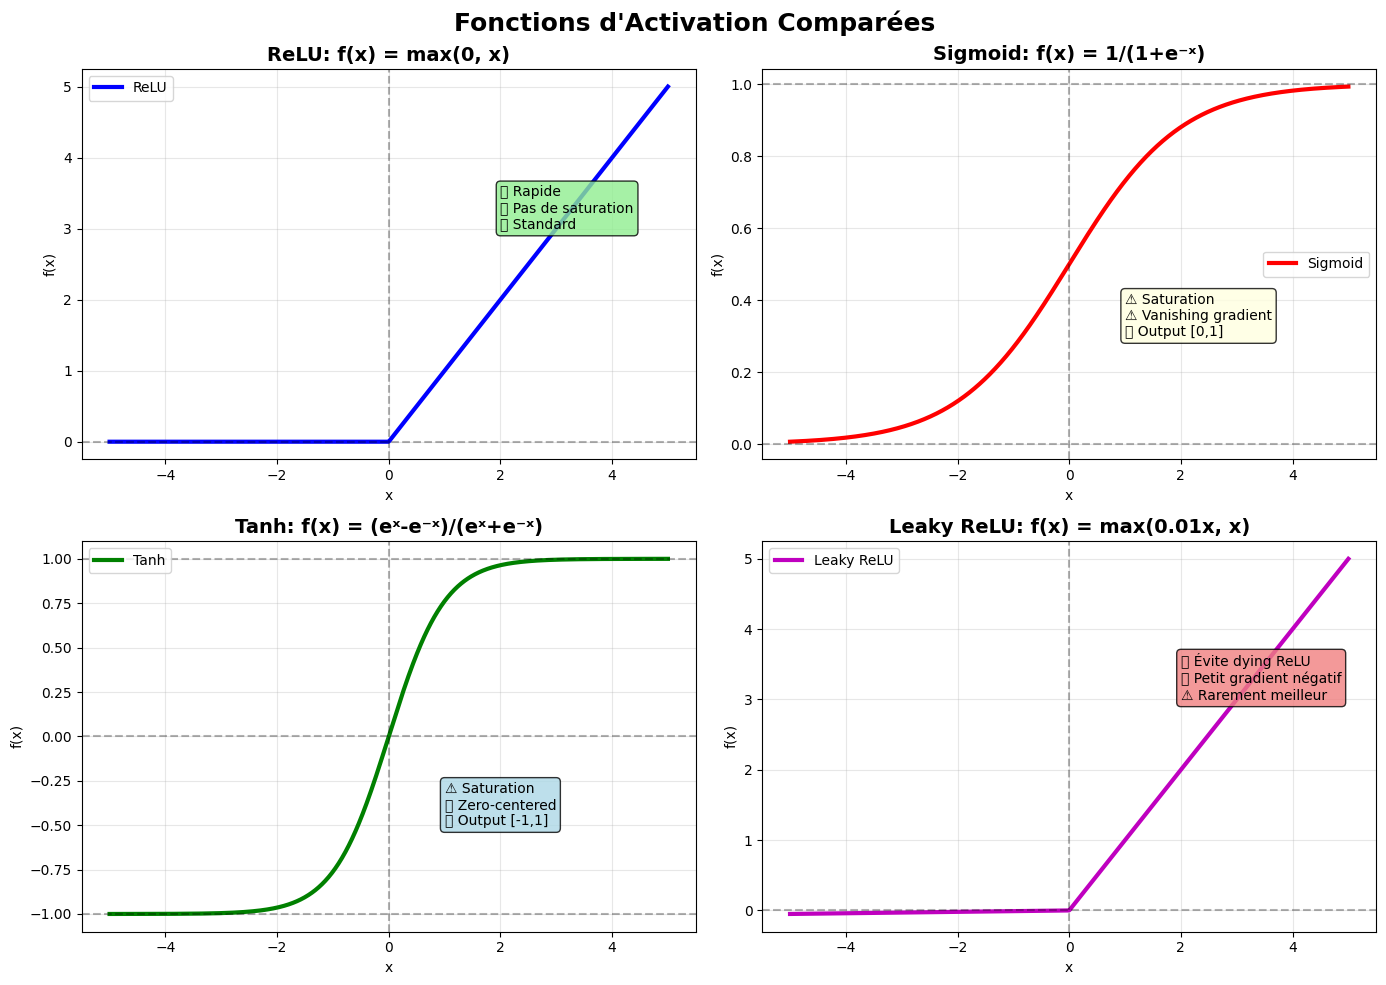


📊 COMPARAISON DES ACTIVATIONS:

ReLU (Rectified Linear Unit):
├─ Formule: f(x) = max(0, x)
├─ Range: [0, ∞)
├─ ✅ Très rapide (pas d'exponentielle)
├─ ✅ Pas de vanishing gradient pour x > 0
├─ ❌ "Dying ReLU": neurones peuvent mourir (toujours 0)
└─ 🎯 MEILLEUR CHOIX pour couches cachées CNN

Sigmoid:
├─ Formule: f(x) = 1/(1+e⁻ˣ)
├─ Range: (0, 1)
├─ ✅ Interprétable comme probabilité
├─ ❌ Saturation (gradient → 0 pour |x| grand)
├─ ❌ Output pas centré sur 0
└─ 🎯 Bon pour couche de sortie binaire

Tanh:
├─ Formule: f(x) = (eˣ-e⁻ˣ)/(eˣ+e⁻ˣ)
├─ Range: (-1, 1)
├─ ✅ Zero-centered (meilleur que sigmoid)
├─ ❌ Saturation similaire à sigmoid
└─ 🎯 Bon pour RNN, rarement utilisé en CNN

Leaky ReLU:
├─ Formule: f(x) = max(αx, x) où α=0.01
├─ Range: (-∞, ∞)
├─ ✅ Évite le problème dying ReLU
├─ ⚠️ Rarement significativement meilleur que ReLU
└─ 🎯 Essayer si ReLU pose problème



In [2]:
# ============================================
# VISUALISATION: Fonctions d'Activation
# ============================================

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)

# Définir les fonctions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Visualiser
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Fonctions d\'Activation Comparées', fontsize=18, fontweight='bold')

# ReLU
axes[0, 0].plot(x, relu(x), 'b-', linewidth=3, label='ReLU')
axes[0, 0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0, 0].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_title('ReLU: f(x) = max(0, x)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('f(x)')
axes[0, 0].legend()
axes[0, 0].text(2, 3, '✅ Rapide\n✅ Pas de saturation\n✅ Standard', 
               bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Sigmoid
axes[0, 1].plot(x, sigmoid(x), 'r-', linewidth=3, label='Sigmoid')
axes[0, 1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0, 1].axhline(y=1, color='k', linestyle='--', alpha=0.3)
axes[0, 1].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_title('Sigmoid: f(x) = 1/(1+e⁻ˣ)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('f(x)')
axes[0, 1].legend()
axes[0, 1].text(1, 0.3, '⚠️ Saturation\n⚠️ Vanishing gradient\n✅ Output [0,1]', 
               bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# Tanh
axes[1, 0].plot(x, tanh(x), 'g-', linewidth=3, label='Tanh')
axes[1, 0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1, 0].axhline(y=1, color='k', linestyle='--', alpha=0.3)
axes[1, 0].axhline(y=-1, color='k', linestyle='--', alpha=0.3)
axes[1, 0].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_title('Tanh: f(x) = (eˣ-e⁻ˣ)/(eˣ+e⁻ˣ)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('f(x)')
axes[1, 0].legend()
axes[1, 0].text(1, -0.5, '⚠️ Saturation\n✅ Zero-centered\n✅ Output [-1,1]', 
               bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Leaky ReLU
axes[1, 1].plot(x, leaky_relu(x), 'm-', linewidth=3, label='Leaky ReLU')
axes[1, 1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1, 1].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_title('Leaky ReLU: f(x) = max(0.01x, x)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('f(x)')
axes[1, 1].legend()
axes[1, 1].text(2, 3, '✅ Évite dying ReLU\n✅ Petit gradient négatif\n⚠️ Rarement meilleur', 
               bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

plt.tight_layout()
plt.show()

print("""
📊 COMPARAISON DES ACTIVATIONS:

ReLU (Rectified Linear Unit):
├─ Formule: f(x) = max(0, x)
├─ Range: [0, ∞)
├─ ✅ Très rapide (pas d'exponentielle)
├─ ✅ Pas de vanishing gradient pour x > 0
├─ ❌ "Dying ReLU": neurones peuvent mourir (toujours 0)
└─ 🎯 MEILLEUR CHOIX pour couches cachées CNN

Sigmoid:
├─ Formule: f(x) = 1/(1+e⁻ˣ)
├─ Range: (0, 1)
├─ ✅ Interprétable comme probabilité
├─ ❌ Saturation (gradient → 0 pour |x| grand)
├─ ❌ Output pas centré sur 0
└─ 🎯 Bon pour couche de sortie binaire

Tanh:
├─ Formule: f(x) = (eˣ-e⁻ˣ)/(eˣ+e⁻ˣ)
├─ Range: (-1, 1)
├─ ✅ Zero-centered (meilleur que sigmoid)
├─ ❌ Saturation similaire à sigmoid
└─ 🎯 Bon pour RNN, rarement utilisé en CNN

Leaky ReLU:
├─ Formule: f(x) = max(αx, x) où α=0.01
├─ Range: (-∞, ∞)
├─ ✅ Évite le problème dying ReLU
├─ ⚠️ Rarement significativement meilleur que ReLU
└─ 🎯 Essayer si ReLU pose problème
""")

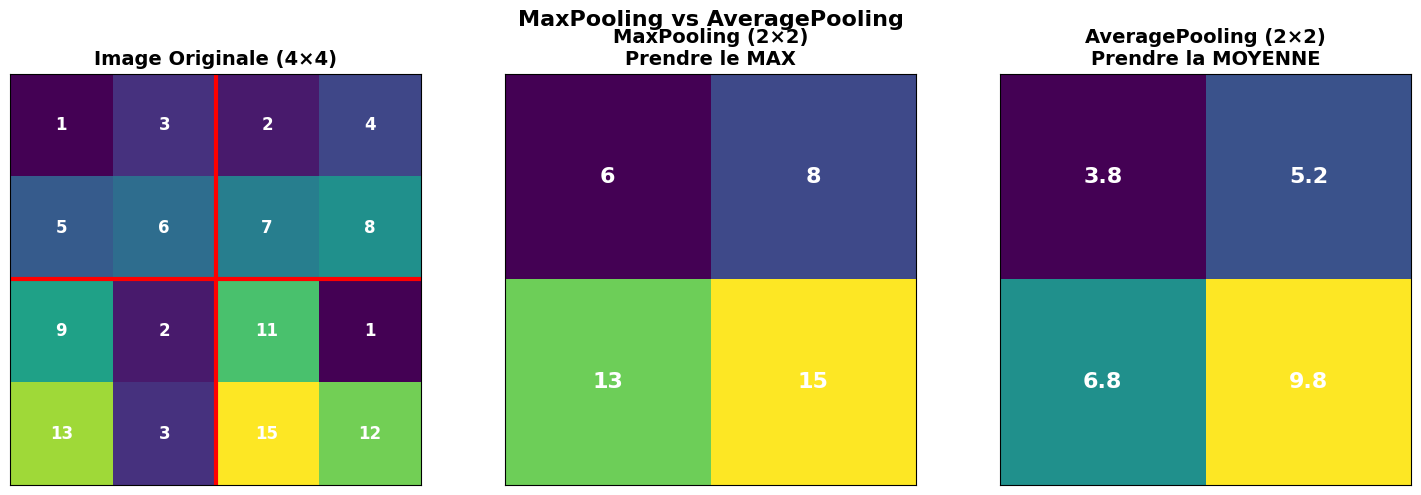


🔍 CALCULS DÉTAILLÉS:

MaxPooling (2×2):
┌─────┬─────┐
│ 1 3 │ 2 4 │
│ 5 6 │ 7 8 │    →    [6  8 ]
├─────┼─────┤         [13 15]
│ 9 2 │11 1 │
│13 3 │15 12│
└─────┴─────┘

Région top-gauche: [1,3,5,6] → max = 6
Région top-droite: [2,4,7,8] → max = 8
Région bot-gauche: [9,2,13,3] → max = 13
Région bot-droite: [11,1,15,12] → max = 15

AveragePooling (2×2):
Région top-gauche: [1,3,5,6] → moy = 3.75
Région top-droite: [2,4,7,8] → moy = 5.25
Région bot-gauche: [9,2,13,3] → moy = 6.75
Région bot-droite: [11,1,15,12] → moy = 9.75



In [3]:
# ============================================
# VISUALISATION: MaxPooling vs AveragePooling
# ============================================

# Image exemple (4×4)
image = np.array([
    [1,  3,  2,  4],
    [5,  6,  7,  8],
    [9,  2, 11,  1],
    [13, 3, 15, 12]
])

def max_pooling(image, pool_size=2):
    """MaxPooling manuel"""
    h, w = image.shape
    output_h, output_w = h // pool_size, w // pool_size
    output = np.zeros((output_h, output_w))
    
    for i in range(output_h):
        for j in range(output_w):
            region = image[i*pool_size:(i+1)*pool_size, 
                          j*pool_size:(j+1)*pool_size]
            output[i, j] = np.max(region)
    
    return output

def average_pooling(image, pool_size=2):
    """AveragePooling manuel"""
    h, w = image.shape
    output_h, output_w = h // pool_size, w // pool_size
    output = np.zeros((output_h, output_w))
    
    for i in range(output_h):
        for j in range(output_w):
            region = image[i*pool_size:(i+1)*pool_size, 
                          j*pool_size:(j+1)*pool_size]
            output[i, j] = np.mean(region)
    
    return output

max_pooled = max_pooling(image, 2)
avg_pooled = average_pooling(image, 2)

# Visualiser
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('MaxPooling vs AveragePooling', fontsize=16, fontweight='bold')

# Image originale avec grille
axes[0].imshow(image, cmap='viridis', interpolation='nearest')
axes[0].set_title('Image Originale (4×4)', fontsize=14, fontweight='bold')
for i in range(4):
    for j in range(4):
        axes[0].text(j, i, str(image[i,j]), ha='center', va='center', 
                    color='white', fontweight='bold', fontsize=12)
# Ajouter lignes de séparation pooling
axes[0].axhline(y=1.5, color='red', linewidth=3)
axes[0].axvline(x=1.5, color='red', linewidth=3)
axes[0].set_xticks([])
axes[0].set_yticks([])

# MaxPooling
axes[1].imshow(max_pooled, cmap='viridis', interpolation='nearest')
axes[1].set_title('MaxPooling (2×2)\nPrendre le MAX', fontsize=14, fontweight='bold')
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, str(int(max_pooled[i,j])), ha='center', va='center', 
                    color='white', fontweight='bold', fontsize=16)
axes[1].set_xticks([])
axes[1].set_yticks([])

# AveragePooling
axes[2].imshow(avg_pooled, cmap='viridis', interpolation='nearest')
axes[2].set_title('AveragePooling (2×2)\nPrendre la MOYENNE', fontsize=14, fontweight='bold')
for i in range(2):
    for j in range(2):
        axes[2].text(j, i, f'{avg_pooled[i,j]:.1f}', ha='center', va='center', 
                    color='white', fontweight='bold', fontsize=16)
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.tight_layout()
plt.show()

print("""
🔍 CALCULS DÉTAILLÉS:

MaxPooling (2×2):
┌─────┬─────┐
│ 1 3 │ 2 4 │
│ 5 6 │ 7 8 │    →    [6  8 ]
├─────┼─────┤         [13 15]
│ 9 2 │11 1 │
│13 3 │15 12│
└─────┴─────┘

Région top-gauche: [1,3,5,6] → max = 6
Région top-droite: [2,4,7,8] → max = 8
Région bot-gauche: [9,2,13,3] → max = 13
Région bot-droite: [11,1,15,12] → max = 15

AveragePooling (2×2):
Région top-gauche: [1,3,5,6] → moy = 3.75
Région top-droite: [2,4,7,8] → moy = 5.25
Région bot-gauche: [9,2,13,3] → moy = 6.75
Région bot-droite: [11,1,15,12] → moy = 9.75
""")

C:\Users\toumi\AppData\Local\Temp\ipykernel_16840\2326790920.py:58: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\toumi\AppData\Local\Temp\ipykernel_16840\2326790920.py:58: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\toumi\Desktop\mnist-digit-recognition\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


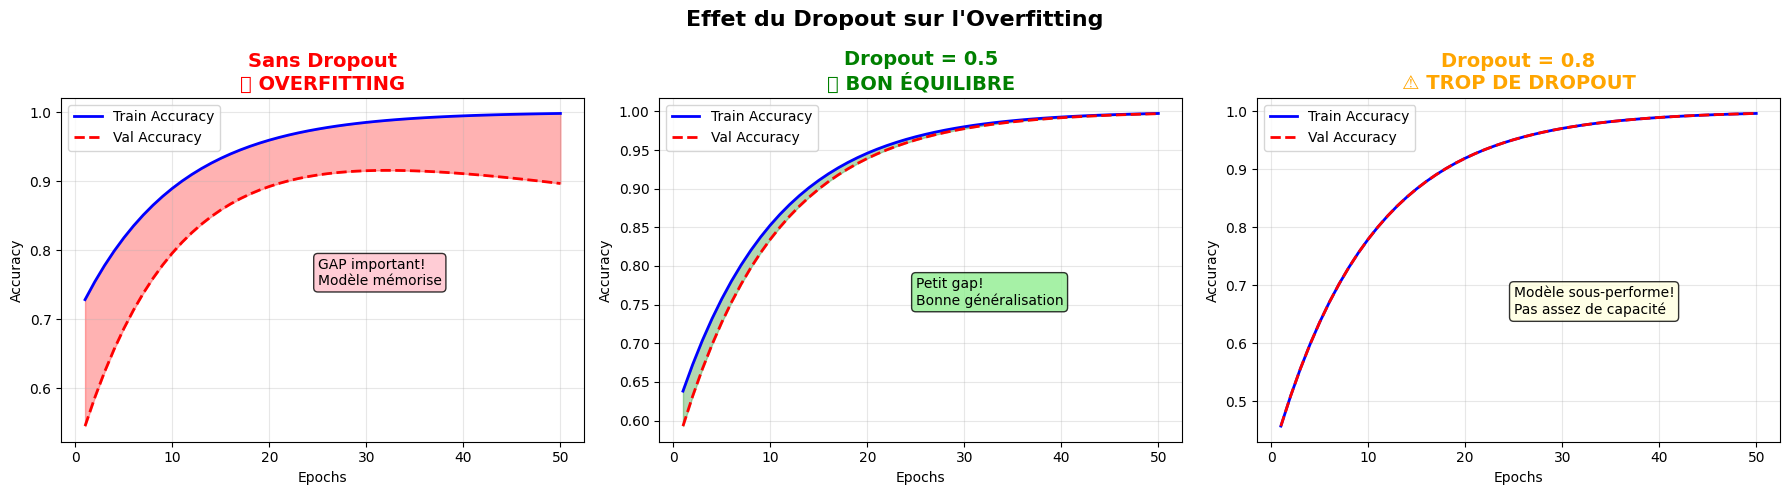


🎯 RÈGLES POUR LE DROPOUT:

Dropout = 0.0 (0%):
├─ Aucun neuron éteint
├─ ❌ Risque d'overfitting élevé
└─ Utiliser seulement si dataset très grand

Dropout = 0.2-0.3 (20-30%):
├─ Léger regularization
├─ ✅ Bon pour Conv layers
└─ Préserve la plupart des features

Dropout = 0.5 (50%):
├─ Regularization standard
├─ ✅ EXCELLENT pour Dense layers
└─ Balance apprentissage et generalisation

Dropout = 0.7-0.8 (70-80%):
├─ Regularization très fort
├─ ⚠️ Peut causer underfitting
└─ Réserver pour cas d'overfitting extrême

💡 NOTRE CHOIX: 0.5 pour la couche Dense
   (Standard de l'industrie pour classification)



In [4]:
# ============================================
# VISUALISATION: Effet du Dropout
# ============================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Effet du Dropout sur l\'Overfitting', fontsize=16, fontweight='bold')

# Simuler des courbes d'apprentissage
epochs = np.arange(1, 51)

# Sans dropout (overfitting)
train_acc_no_dropout = 1 - 0.3 * np.exp(-epochs/10)
val_acc_no_dropout = 1 - 0.5 * np.exp(-epochs/10) - 0.002 * epochs

# Avec dropout moyen (bon)
train_acc_dropout = 1 - 0.4 * np.exp(-epochs/10)
val_acc_dropout = 1 - 0.45 * np.exp(-epochs/10)

# Avec trop de dropout (underfitting)
train_acc_high_dropout = 1 - 0.6 * np.exp(-epochs/10)
val_acc_high_dropout = 1 - 0.6 * np.exp(-epochs/10)

# Plot 1: Sans Dropout
axes[0].plot(epochs, train_acc_no_dropout, 'b-', linewidth=2, label='Train Accuracy')
axes[0].plot(epochs, val_acc_no_dropout, 'r--', linewidth=2, label='Val Accuracy')
axes[0].set_title('Sans Dropout\n❌ OVERFITTING', fontsize=14, fontweight='bold', color='red')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].fill_between(epochs, train_acc_no_dropout, val_acc_no_dropout, alpha=0.3, color='red')
axes[0].text(25, 0.75, 'GAP important!\nModèle mémorise', 
            bbox=dict(boxstyle='round', facecolor='pink', alpha=0.8))

# Plot 2: Avec Dropout (bon)
axes[1].plot(epochs, train_acc_dropout, 'b-', linewidth=2, label='Train Accuracy')
axes[1].plot(epochs, val_acc_dropout, 'r--', linewidth=2, label='Val Accuracy')
axes[1].set_title('Dropout = 0.5\n✅ BON ÉQUILIBRE', fontsize=14, fontweight='bold', color='green')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].fill_between(epochs, train_acc_dropout, val_acc_dropout, alpha=0.3, color='green')
axes[1].text(25, 0.75, 'Petit gap!\nBonne généralisation', 
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Plot 3: Trop de Dropout
axes[2].plot(epochs, train_acc_high_dropout, 'b-', linewidth=2, label='Train Accuracy')
axes[2].plot(epochs, val_acc_high_dropout, 'r--', linewidth=2, label='Val Accuracy')
axes[2].set_title('Dropout = 0.8\n⚠️ TROP DE DROPOUT', fontsize=14, fontweight='bold', color='orange')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('Accuracy')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].text(25, 0.65, 'Modèle sous-performe!\nPas assez de capacité', 
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

print("""
🎯 RÈGLES POUR LE DROPOUT:

Dropout = 0.0 (0%):
├─ Aucun neuron éteint
├─ ❌ Risque d'overfitting élevé
└─ Utiliser seulement si dataset très grand

Dropout = 0.2-0.3 (20-30%):
├─ Léger regularization
├─ ✅ Bon pour Conv layers
└─ Préserve la plupart des features

Dropout = 0.5 (50%):
├─ Regularization standard
├─ ✅ EXCELLENT pour Dense layers
└─ Balance apprentissage et generalisation

Dropout = 0.7-0.8 (70-80%):
├─ Regularization très fort
├─ ⚠️ Peut causer underfitting
└─ Réserver pour cas d'overfitting extrême

💡 NOTRE CHOIX: 0.5 pour la couche Dense
   (Standard de l'industrie pour classification)
""")

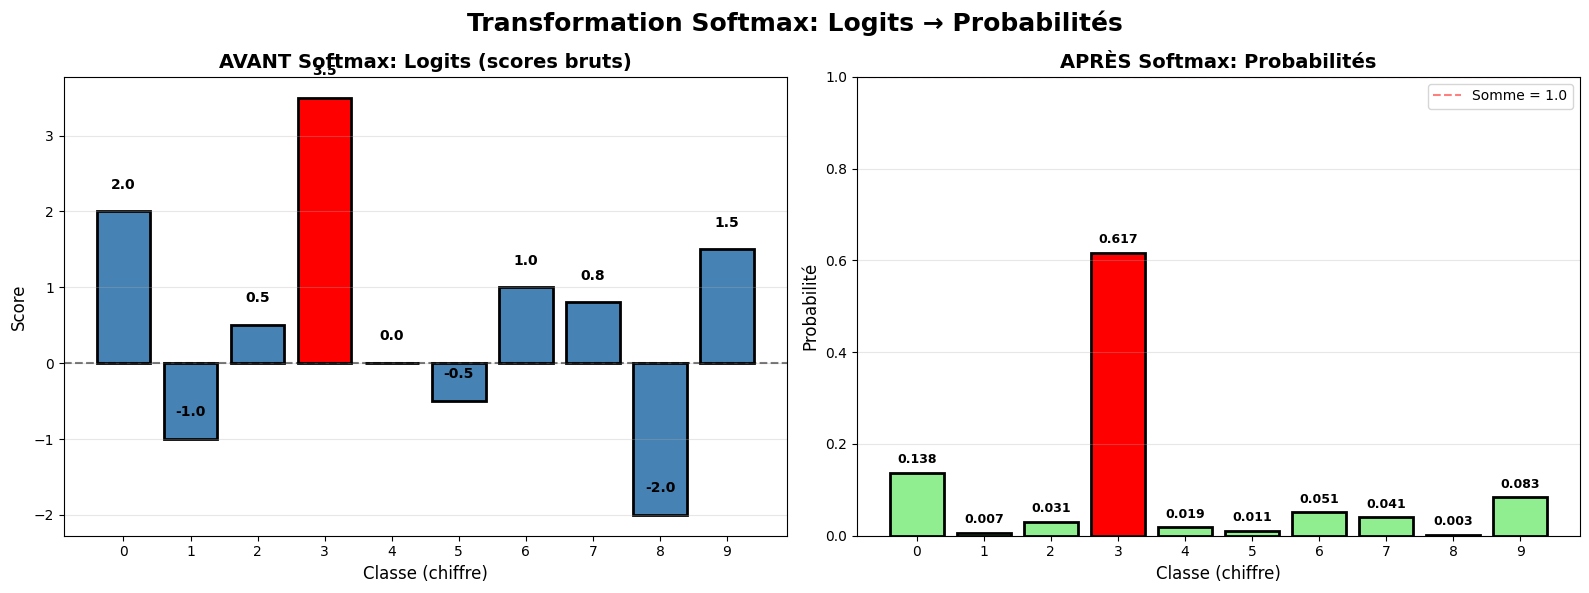


📊 RÉSULTATS:

AVANT Softmax (Logits):
├─ Valeurs: [ 2.  -1.   0.5  3.5  0.  -0.5  1.   0.8 -2.   1.5]
├─ Range: [-2.0, 3.5]
├─ Somme: 5.80
└─ Maximum: Classe 3 (score 3.5)

APRÈS Softmax (Probabilités):
├─ Valeurs: [0.13762832 0.00685211 0.03070903 0.61680733 0.01862597 0.01129722
 0.05063063 0.04145285 0.00252075 0.08347579]
├─ Range: [0.0025, 0.6168]
├─ Somme: 1.000000 ≈ 1.0 ✓
└─ Maximum: Classe 3 (61.7% confiance)

🎯 INTERPRÉTATION:
Le modèle est 61.7% sûr que c'est un "3"



In [5]:
# ============================================
# VISUALISATION: Softmax Function
# ============================================

def softmax(z):
    """Calcule softmax"""
    exp_z = np.exp(z - np.max(z))  # Soustraction pour stabilité numérique
    return exp_z / exp_z.sum()

# Scores exemple
logits = np.array([2.0, -1.0, 0.5, 3.5, 0.0, -0.5, 1.0, 0.8, -2.0, 1.5])
probs = softmax(logits)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Transformation Softmax: Logits → Probabilités', 
             fontsize=18, fontweight='bold')

# Logits (avant softmax)
colors_logits = ['red' if i == np.argmax(logits) else 'steelblue' for i in range(10)]
axes[0].bar(range(10), logits, color=colors_logits, edgecolor='black', linewidth=2)
axes[0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0].set_title('AVANT Softmax: Logits (scores bruts)', 
                 fontsize=14, fontweight='bold')
axes[0].set_xlabel('Classe (chiffre)', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_xticks(range(10))
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(logits):
    axes[0].text(i, v + 0.3, f'{v:.1f}', ha='center', fontweight='bold')

# Probabilités (après softmax)
colors_probs = ['red' if i == np.argmax(probs) else 'lightgreen' for i in range(10)]
axes[1].bar(range(10), probs, color=colors_probs, edgecolor='black', linewidth=2)
axes[1].axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='Somme = 1.0')
axes[1].set_title('APRÈS Softmax: Probabilités', 
                 fontsize=14, fontweight='bold')
axes[1].set_xlabel('Classe (chiffre)', fontsize=12)
axes[1].set_ylabel('Probabilité', fontsize=12)
axes[1].set_xticks(range(10))
axes[1].set_ylim([0, 1.0])
axes[1].grid(axis='y', alpha=0.3)
axes[1].legend()
for i, v in enumerate(probs):
    axes[1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"""
📊 RÉSULTATS:

AVANT Softmax (Logits):
├─ Valeurs: {logits}
├─ Range: [{logits.min():.1f}, {logits.max():.1f}]
├─ Somme: {logits.sum():.2f}
└─ Maximum: Classe {np.argmax(logits)} (score {logits.max():.1f})

APRÈS Softmax (Probabilités):
├─ Valeurs: {probs}
├─ Range: [{probs.min():.4f}, {probs.max():.4f}]
├─ Somme: {probs.sum():.6f} ≈ 1.0 ✓
└─ Maximum: Classe {np.argmax(probs)} ({probs.max()*100:.1f}% confiance)

🎯 INTERPRÉTATION:
Le modèle est {probs.max()*100:.1f}% sûr que c'est un "{np.argmax(probs)}"
""")